In [1]:
# Import necessary libraries
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
import warnings
#pip install xgboost

In [2]:
# Loading data
file_path = Path("../Project-2/Resources/credit card data.csv")
df = pd.read_csv(file_path)

In [3]:
#View DataFrame
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


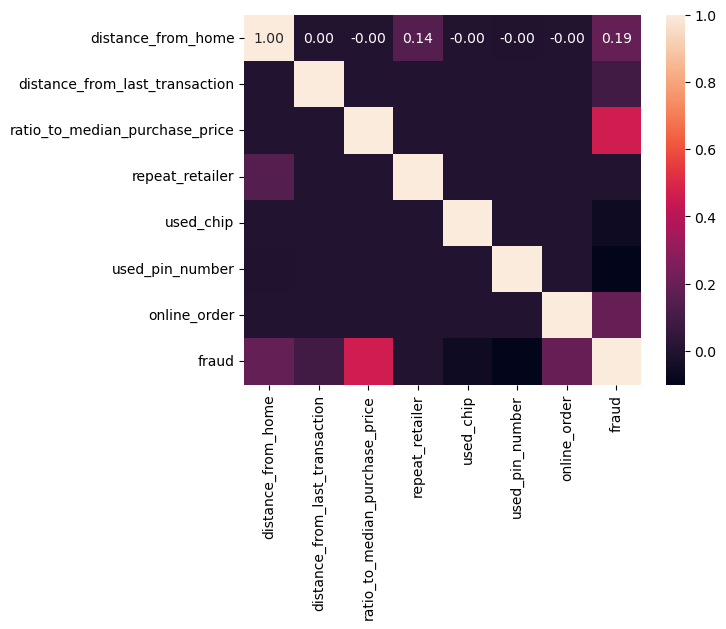

<Figure size 640x480 with 0 Axes>

In [4]:
# plotting correlation heatmap 
dataplot=sns.heatmap(df.corr(),annot=True,fmt=".2f") 
  
# displaying heatmap 
plt.show()

# Save the heatmap as a PNG file
plt.savefig('heatmap.png')

In [5]:
#Create first dataset to test
test_set_1 = df[:10000]
test_set_1


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
9995,4.225100,2.678220,0.556858,1,0,0,1,0
9996,3.614858,0.431593,0.061778,1,0,0,1,0
9997,10.131863,10.262508,2.818090,1,0,0,1,0
9998,16.306236,0.014054,1.904495,1,0,0,1,0


In [6]:
# Split target column from dataset
y = test_set_1['fraud']
X = test_set_1.drop(columns='fraud')


In [7]:
# Print first five entries for target
display(y[:5])

display(X.head())


0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1


In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [9]:
#Shape the training data
X_train.shape


(7500, 7)

In [10]:
#Shape the test data 
X_test.shape


(2500, 7)

In [11]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [12]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)


In [14]:
#Fit the model
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [15]:
# Create predictions
y_pred_knn = knn_model.predict(X_test_scaled)
# Review the predictions
y_pred_knn


array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
# Print classification reports for K-Nearest Model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_pred_knn, y_test))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303
           1       0.95      0.97      0.96       197

    accuracy                           0.99      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500



In [17]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)


In [18]:
# Print classification reports for Gradient Boosting Model
print("Gradient Boosting Classification Report:")
print(classification_report(y_pred_gb, y_test))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2304
           1       0.98      1.00      0.99       196

    accuracy                           1.00      2500
   macro avg       0.99      1.00      0.99      2500
weighted avg       1.00      1.00      1.00      2500



In [19]:
# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [20]:
# Print classification reports for XGBoost Model
print("XGBoost Classification Report:")
print(classification_report(y_pred_xgb, y_test))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2301
           1       0.99      0.99      0.99       199

    accuracy                           1.00      2500
   macro avg       0.99      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [21]:
#Create second test data
test_set_2 = df[:20000]
test_set_2


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
19995,3.588267,10.231303,0.966398,1,0,0,1,0
19996,23.172554,1.328389,3.505177,1,1,1,1,0
19997,35.762042,19.427188,0.812355,1,1,0,1,0
19998,38.799543,0.772350,0.235831,1,1,0,1,0


In [22]:
# Split target column from dataset
y = test_set_2['fraud']
X = test_set_2.drop(columns='fraud')

In [23]:
# Print first five entries for target
display(y[:5])

display(X.head())


0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1


In [24]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [25]:
X_train.shape

(15000, 7)

In [26]:
X_test.shape

(5000, 7)

In [27]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [28]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# K-Nearest Neighbors
knn_model_2 = KNeighborsClassifier(n_neighbors=3)

In [30]:
#Fit the model
knn_model_2.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Create predictions
y_pred_knn = knn_model_2.predict(X_test_scaled)
# Review the predictions
y_pred_knn


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
# Print classification reports for K-Nearest Model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_pred_knn, y_test))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4577
           1       0.95      0.99      0.97       423

    accuracy                           0.99      5000
   macro avg       0.98      0.99      0.98      5000
weighted avg       1.00      0.99      1.00      5000



In [33]:
from sklearn.feature_selection import mutual_info_classif
# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Display feature importances
for feature, importance in zip(X.columns, mutual_info):
    print(f'{feature}: {importance}')

distance_from_home: 0.024017856660625503
distance_from_last_transaction: 0.007748934989511014
ratio_to_median_purchase_price: 0.11563602609578871
repeat_retailer: 0.003665297635703668
used_chip: 0.004269796414991145
used_pin_number: 0.009905852937157622
online_order: 0.033132762432168894


In [34]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

In [35]:
# Print classification reports for Gradient Boosting Model
print("Gradient Boosting Classification Report:")
print(classification_report(y_pred_gb, y_test))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4564
           1       0.99      1.00      1.00       436

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



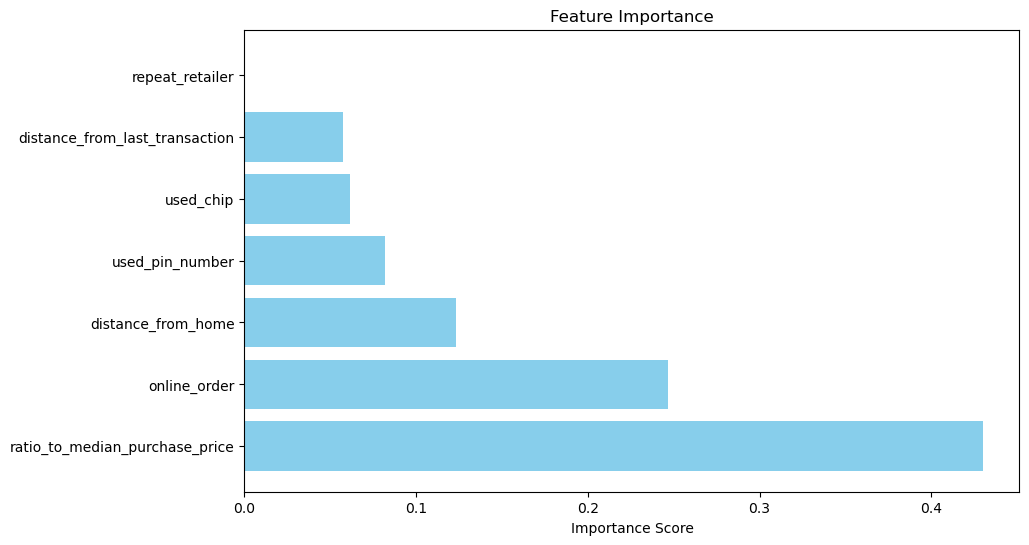

In [36]:
feature_importances = gb_model.feature_importances_
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [37]:
# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [38]:
# Print classification reports for XGBoost Model
print("XGBoost Classification Report:")
print(classification_report(y_pred_xgb, y_test))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4567
           1       0.98      0.99      0.99       433

    accuracy                           1.00      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000



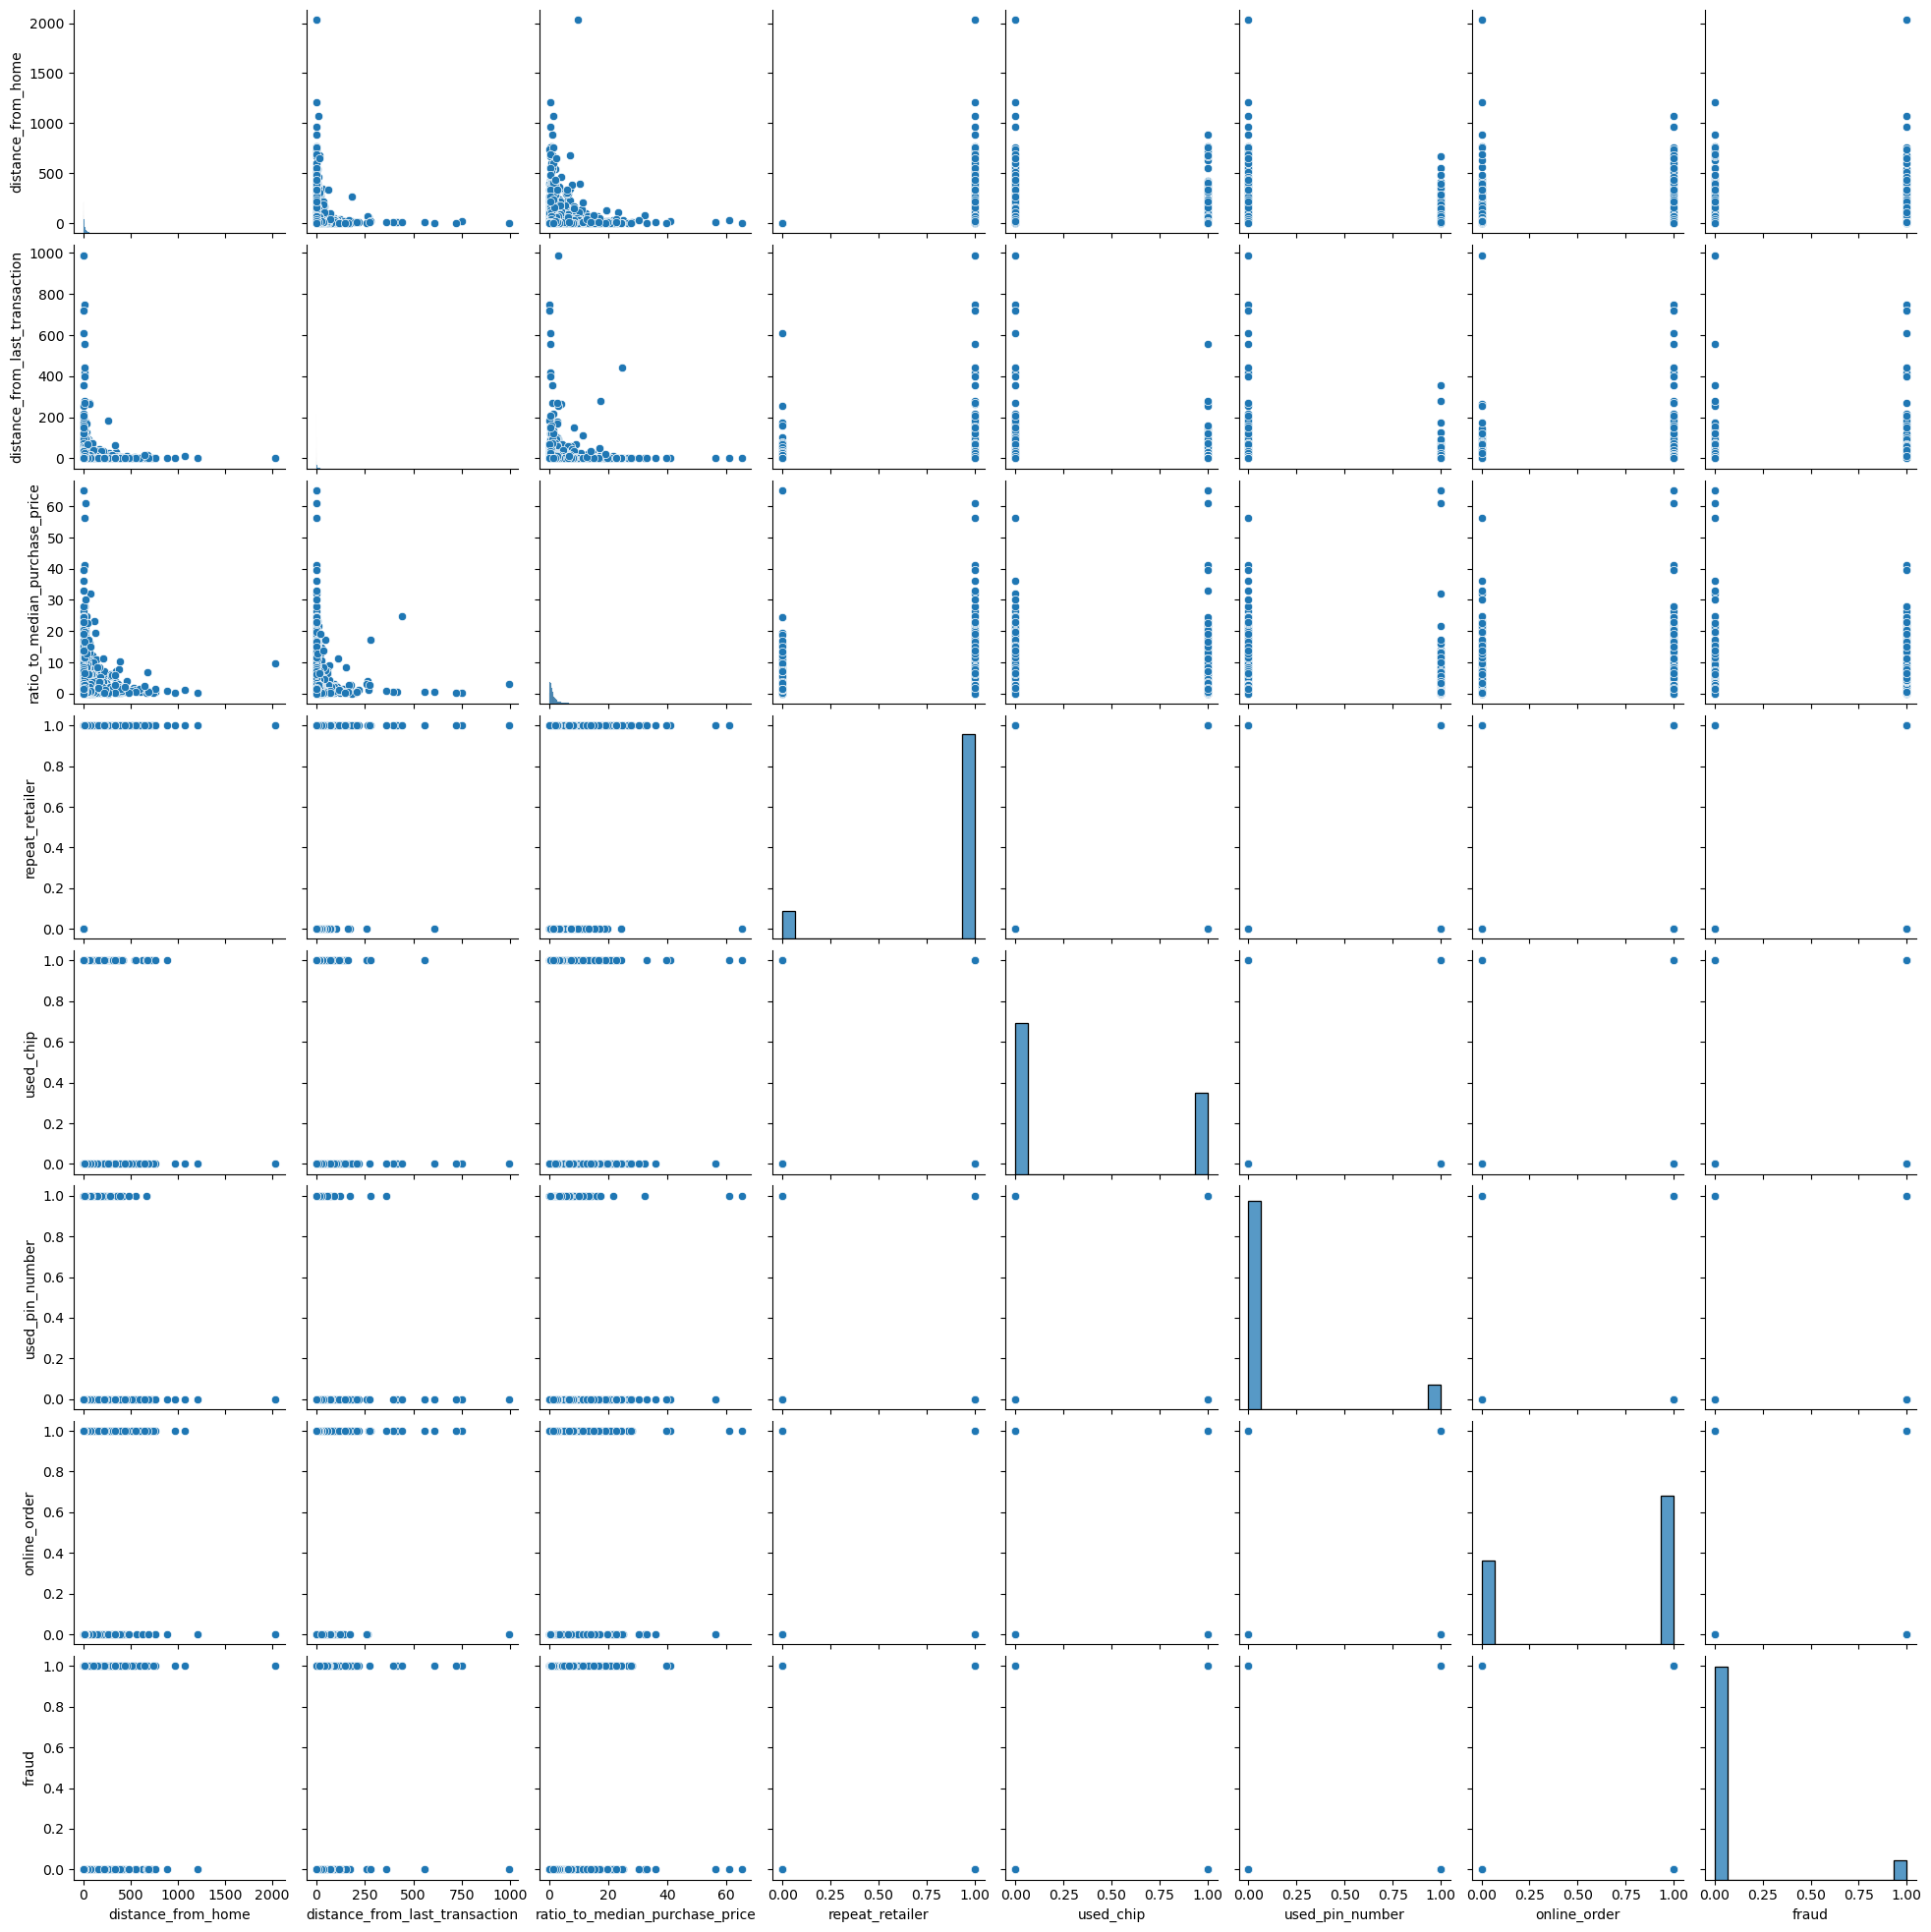

In [39]:
warnings.filterwarnings("ignore")
sns.pairplot(test_set_1)
